Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [1]:
#!pip install category_encoders
import pandas as pd
import category_encoders as ce

import sklearn 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import Image, display, clear_output
import os
import time
#from tqdm.notebook import tqdm

In [3]:
np.random.seed(7)
iteration=0

In [4]:
df_1 = pd.read_pickle("2018_data_company_type_nb_employes_zip_code.pkl")
df_2 = pd.read_pickle("2019_data_company_type_nb_employes_zip_code.pkl")
df = pd.concat([df_1, df_2], axis=0)

In [5]:
df.shape

(29039, 13)

In [6]:
#df = df.sample(frac = 1)
df = df.reset_index().drop('start_date', axis=1).dropna()
df = df.drop("Zip_Code", axis=1)

In [7]:
indc = ((df._get_numeric_data() == df._get_numeric_data().astype(int)) == True).index

In [8]:
df = df.loc[indc]

In [9]:
#q = df.Equity.quantile(0.999)
#outliers = df[df.Equity > q]

#df = df[df.Equity < q]
df = df[df.Target > 0]
df['diff'] = df.Target - df.Equity
q = df['diff'].quantile(0.99)
df = df[df['diff'] < q]
df = df.drop('diff', axis=1)
df = df.dropna()

In [10]:
# keep 2 first numbers of zip code
#df.Zip_Code = df.Zip_Code.apply(lambda x: x[:2])

In [11]:
df = df.drop(['entity'], axis=1)

In [12]:
df.corr()

,AverageNumberOfEmployees,ContributedCapital,CurrentAssets,Equity,LiabilitiesAndEquity,ProfitLoss,ProfitLossFromOrdinaryActivitiesBeforeTax,RetainedEarnings,ShorttermLiabilitiesOtherThanProvisions,Target
AverageNumberOfEmployees,1.000000,0.003525,0.012748,0.005428,0.008050,0.002041,0.003072,0.011024,0.012441,0.008242
ContributedCapital,0.003525,1.000000,0.762735,0.851656,0.933197,0.910006,0.664999,0.559632,0.888149,0.897342
CurrentAssets,0.012748,0.762735,1.000000,0.828724,0.854327,0.760714,0.599740,0.834500,0.850953,0.749288
Equity,0.005428,0.851656,0.828724,1.000000,0.924844,0.798154,0.663161,0.717371,0.855544,0.891442
LiabilitiesAndEquity,0.008050,0.933197,0.854327,0.924844,1.000000,0.941071,0.709297,0.673095,0.960010,0.947724
ProfitLoss,0.002041,0.910006,0.760714,0.798154,0.941071,1.000000,0.703764,0.535300,0.898859,0.891735
ProfitLossFromOrdinaryActivitiesBeforeTax,0.003072,0.664999,0.599740,0.663161,0.709297,0.703764,1.000000,0.434147,0.679961,0.663181
RetainedEarnings,0.011024,0.559632,0.834500,0.717371,0.673095,0.535300,0.434147,1.000000,0.586095,0.669296
ShorttermLiabilitiesOtherThanProvisions,0.012441,0.888149,0.850953,0.855544,0.960010,0.898859,0.679961,0.586095,1.000000,0.859646
Target,0.008242,0.897342,0.749288,0.891442,0.947724,0.891735,0.663181,0.669296,0.859646,1.000000


In [13]:
# sns.pairplot(df)

In [14]:
#df['Class_E'] = (df.CurrentAssets<1e4).astype(int)
#df['Class_D'] = (df.CurrentAssets>1e4).astype(int) * (df.CurrentAssets<1e5).astype(int)
##df['Class_C'] = (df.CurrentAssets>1e5).astype(int) * (df.CurrentAssets<1e6).astype(int)
#df['Class_B'] = (df.CurrentAssets>1e6).astype(int) * (df.CurrentAssets<1e7).astype(int)
#df['Class_A'] = (df.CurrentAssets>1e7).astype(int)

In [15]:
df = df.dropna()
df.head()

,AverageNumberOfEmployees,Class,ContributedCapital,CurrentAssets,Equity,LiabilitiesAndEquity,ProfitLoss,ProfitLossFromOrdinaryActivitiesBeforeTax,RetainedEarnings,ShorttermLiabilitiesOtherThanProvisions,Target
0,63.0,C,500000.0,26761906.0,8.388893e+06,33863872.0,7.728920e+05,1348241.0,7888893.0,24731907.0,3.826671e+06
1,1.0,B,125000.0,346382.0,3.454928e+06,9769113.0,6.671888e+05,1580776.0,1684450.0,1174378.0,4.581802e+06
2,0.0,B,49330.0,49330.0,4.933000e+04,49330.0,0.000000e+00,0.0,0.0,0.0,4.933000e+04
3,0.0,B,125000.0,911000.0,2.007000e+06,3438000.0,6.500000e+05,1287000.0,892000.0,430000.0,2.649530e+07
4,1.0,B,200000.0,719272.0,2.071469e+07,32497844.0,2.817644e+06,3630324.0,20514688.0,2110204.0,1.568822e+07


In [16]:
df.groupby('Class').count()

,AverageNumberOfEmployees,ContributedCapital,CurrentAssets,Equity,LiabilitiesAndEquity,ProfitLoss,ProfitLossFromOrdinaryActivitiesBeforeTax,RetainedEarnings,ShorttermLiabilitiesOtherThanProvisions,Target
Class,,,,,,,,,,
B,23809,23809,23809,23809,23809,23809,23809,23809,23809,23809
C,2220,2220,2220,2220,2220,2220,2220,2220,2220,2220
D,6,6,6,6,6,6,6,6,6,6


In [17]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.linear_model import LinearRegression, SGDRegressor

import joblib
import sklearn.metrics as metrics
def regression_results(y_true, y_pred):

    # Regression metrics
    explained_variance=metrics.explained_variance_score(y_true, y_pred)
    mean_absolute_error=metrics.mean_absolute_error(y_true, y_pred) 
    mse=metrics.mean_squared_error(y_true, y_pred) 
    #mean_squared_log_error=metrics.mean_squared_log_error(y_true, y_pred)
    median_absolute_error=metrics.median_absolute_error(y_true, y_pred)
    r2=metrics.r2_score(y_true, y_pred)

    print('explained_variance: ', round(explained_variance,4))    
    #print('mean_squared_log_error: ', round(mean_squared_log_error,4))
    print('r2: ', round(r2,4))
    print('MAE: ', round(mean_absolute_error,4))
    print('MSE: ', round(mse,4))
    print('RMSE: ', round(np.sqrt(mse),4))
    print('Median AE: ', round(median_absolute_error,4))

In [18]:
numeric_features = df.select_dtypes(include=['int64', 'float64']).drop(['Target'], axis=1).columns
categorical_features = df.select_dtypes(include=['object']).columns
X = df.drop('Target', axis=1)
y = df['Target']
print("Numerical Features: ", list(numeric_features))
print("Categorical Features: ", list(categorical_features))

Numerical Features:  ['AverageNumberOfEmployees', 'ContributedCapital', 'CurrentAssets', 'Equity', 'LiabilitiesAndEquity', 'ProfitLoss', 'ProfitLossFromOrdinaryActivitiesBeforeTax', 'RetainedEarnings', 'ShorttermLiabilitiesOtherThanProvisions']
Categorical Features:  ['Class']


In [19]:
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)


In [20]:
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=.5)

In [21]:
numeric_transformer = Pipeline(steps=[
    #('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])

categorical_transformer = Pipeline(steps=[
    #('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
        ('enc', ce.one_hot.OneHotEncoder())])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])



In [22]:
x_scaler = preprocessor
y_scaler = StandardScaler()
#scale train
X_train_scaled = x_scaler.fit_transform(X_train)
y_train_scaled = y_scaler.fit_transform(y_train.values.reshape(-1,1))


#scale test
X_test_scaled = x_scaler.transform(X_test)
y_test_scaled = y_scaler.transform(y_test.values.reshape(-1,1))

#scale validation
X_val_scaled = x_scaler.transform(X_val)
y_val_scaled = y_scaler.transform(y_val.values.reshape(-1,1))

In [23]:
clf = GradientBoostingRegressor()
preds = clf.fit(X_train_scaled, y_train_scaled).predict(X_test_scaled)

C:\Users\niskl\Anaconda3\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [24]:
regression_results(y_test_scaled, preds)

explained_variance:  0.1436
r2:  0.1434
MAE:  0.1226
MSE:  26.8014
RMSE:  5.177
Median AE:  0.0039


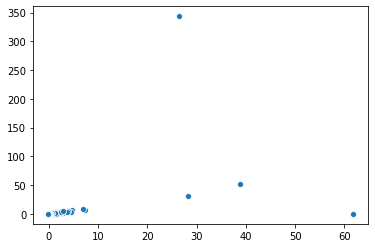

In [25]:
sns.scatterplot(preds.flatten(), y_test_scaled.flatten())

IndexError: index 10 is out of bounds for axis 0 with size 10

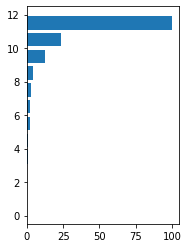

In [26]:
#X_train, X_test, y_train, y_test = train_test_split(df.drop(["Target"], axis=1), df.Target, test_size=0.2, random_state=42)

# Plot feature importance
feature_importance = clf.feature_importances_
# make importances relative to max importance
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
plt.subplot(1, 2, 2)
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, X.columns[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()


In [27]:
from sklearn.model_selection import RandomizedSearchCV
loss = ['ls', 'lad', 'huber']
n_estimators = [100, 500, 900, 1100, 1500]
max_depth = [2, 3, 5, 10, 15]
min_samples_leaf = [1, 2, 4, 6, 8] 
min_samples_split = [2, 4, 6, 10]
max_features = ['auto', 'sqrt', 'log2', None]

# Define the grid of hyperparameters to search
hyperparameter_grid = {'loss': loss,
    'n_estimators': n_estimators,
    'max_depth': max_depth,
    'min_samples_leaf': min_samples_leaf,
    'min_samples_split': min_samples_split,
    'max_features': max_features}



In [28]:
# Set up the random search with 4-fold cross validation
random_cv = RandomizedSearchCV(estimator=clf,
            param_distributions=hyperparameter_grid,
            cv=3, n_iter=50,
            scoring = 'neg_mean_absolute_error',n_jobs = 4,
            verbose = 5, 
            return_train_score = True,
            random_state=42)
random_cv.fit(X_train,y_train)


Fitting 3 folds for each of 50 candidates, totalling 150 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.


ValueError: could not convert string to float: 'B'

In [27]:
best_params = random_cv.best_params_

NameError: name 'random_cv' is not defined

In [28]:
rgs = GradientBoostingRegressor(**best_params)

NameError: name 'best_params' is not defined

In [29]:
rgs.fit(X_train, y_train)

NameError: name 'rgs' is not defined

In [30]:
preds = rgs.predict(X_test)
regression_results(y_test, preds)

NameError: name 'rgs' is not defined

In [31]:
# Plot feature importance
feature_importance = rgs.feature_importances_
# make importances relative to max importance
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
plt.subplot(1, 2, 2)
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, X_train.columns[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

NameError: name 'rgs' is not defined

TypeError: float() argument must be a string or a number, not 'builtin_function_or_method'

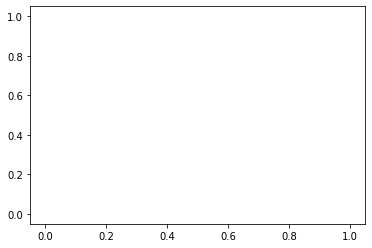

In [32]:
sns.scatterplot(preds.flatten, y_test.values)

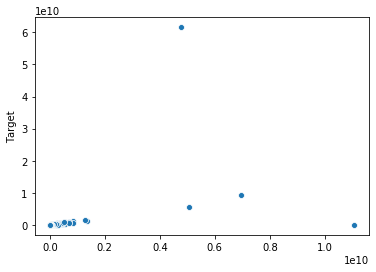

In [33]:
sns.scatterplot(y_scaler.inverse_transform(preds), y_test)

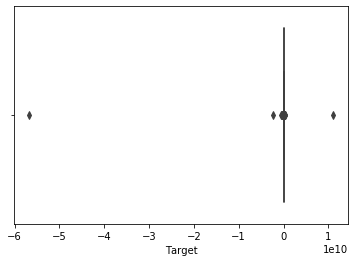

In [34]:
sns.boxplot(y_scaler.inverse_transform(preds) - y_test)

## Neural Network

In [46]:
#!pip install --upgrade torch
#!pip install tensorboard
import torch 
torch.manual_seed(42)
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torch.utils.data import DataLoader,Dataset
#pip install torch.utils.tensorboard
#from torch.utils import tensorboard
#import torch.utils.tensorboard as tb
from torch.utils.tensorboard import SummaryWriter


Requirement already up-to-date: torch in c:\users\niskl\anaconda3\lib\site-packages (1.3.1)
  Created wheel for absl-py: filename=absl_py-0.9.0-cp37-none-any.whl size=121936 sha256=c8f317b2f403f6ab37d44bb54b02d7ed3077a5eb910927aae848b2d2b85d06bc
  Stored in directory: C:\Users\niskl\AppData\Local\pip\Cache\wheels\8e\28\49\fad4e7f0b9a1227708cbbee4487ac8558a7334849cb81c813d
Successfully built absl-py


In [30]:
class Dataset(Dataset):
    
    def __init__(self, X, y):
        
        #self.data = dataframe
        self.X = torch.from_numpy(X)
        self.y = torch.from_numpy(y)
        
    def __len__(self):
        return len(self.X)
    
    def nb_features(self):
        return self.X.shape[1]
    
    def __getitem__(self, idx):
        if torch.is_tensor(idx):
            idx = idx.tolist()
        
        sample = self.X[idx] ,self.y[idx]
        
        return sample

In [31]:
batch_size = 32

train_dataset = Dataset(X_train_scaled, y_train_scaled)
validation_dataset = Dataset(X_val_scaled, y_val_scaled)
test_dataset = Dataset(X_test_scaled, y_test_scaled)

# Creating PT data samplers and loaders:
#train_sampler = SubsetRandomSampler(train_indices)
#valid_sampler = SubsetRandomSampler(val_indices)
#test_sampler = SubsetRandomSampler(test_indices)

train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size)
val_loader = torch.utils.data.DataLoader(validation_dataset, batch_size=batch_size)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=batch_size)


In [32]:
class NN2(nn.Module):
    def __init__(self, input_dim, layers_dim, activations):
        
        super(NN2, self).__init__()
        
        layers = []

        for i in range(len(layers_dim)-1):
          
          # Use input dimensions here first
          if i == 0:
            layers.append(nn.Linear(input_dim, layers_dim[i]))
            #layers.append(nn.BatchNorm1d(layers_dim[0]))
            if activations[0] == 'relu':
              layers.append(nn.ReLU())
            elif activations[0] == 'elu':
              layers.append(nn.ELU())
            elif activations[0] == 'leaky':
              layers.append(nn.LeakyReLU())
            elif activations[0] == 'tanh':
              layers.append(nn.Tanh())
            else:
              continue
          else:
            layers.append(nn.Linear(layers_dim[i-1], layers_dim[i]))
            #layers.append(nn.BatchNorm1d(layers_dim[i]))
            if activations[i] == 'relu':
              layers.append(nn.ReLU())
            elif activations[i] == 'elu':
              layers.append(nn.ELU())
            elif activations[i] == 'leaky':
              layers.append(nn.LeakyReLU())
            elif activations[i] == 'tanh':
              layers.append(nn.Tanh())
            else:
              continue

        layers.append(nn.Linear(layers_dim[-2], layers_dim[-1]))
#         if activations[-1] == 'relu':
#           layers.append(nn.ReLU())
#         elif activations[-1] == 'elu':
#           layers.append(nn.ELU())
#         elif activations[-1] == 'leaky':
#           layers.append(nn.LeakyReLU())
#         elif activations[-1] == 'tanh':
#           layers.append(nn.Tanh())
#         else:
#           print('')

        self.out = nn.Sequential(*layers)


    def forward(self, x):
           
        return self.out(x)

def weight_init(m):
  if isinstance(m, nn.Linear):
      (nn.init.kaiming_normal_(m.weight) + 50)

In [33]:
class NN(nn.Module):
    def __init__(self, input_dim):
        
        super(NN, self).__init__()
        
        self.l1 = nn.Linear(input_dim, 512)
        #self.bn1 = nn.BatchNorm1d(512)
        
        self.l2 = nn.Linear(512, 256)
        #self.bn2 = nn.BatchNorm1d(256)
        
        self.l3 = nn.Linear(256, 128)
        #self.bn3 = nn.BatchNorm1d(64)

        self.l4 = nn.Linear(128, 32)

        
        self.out = nn.Linear(32, 1)


    def forward(self, x):
        
        x = F.dropout(F.relu(self.l1(x)),0.3, training = self.training)
        
        x = F.dropout(F.relu(self.l2(x)),0.3, training = self.training)
        
        x = F.dropout(F.relu(self.l3(x)),0.3, training = self.training)
        
        x = F.dropout(F.relu(self.l4(x)),0.3, training = self.training)


        x = self.out(x)
        
        return x

def weight_init(m):
    if isinstance(m, nn.Linear):
        (nn.init.kaiming_normal_(m.weight))

In [79]:
def train():
    # set the train mode
    model.train()

    # loss of the epoch
    train_loss = 0
  
    for x, target in train_loader:

        target = target.float().to(device)
        x = x.to(device)
        # update the gradients to zero
        optimizer.zero_grad()

        # forward pass
        ouput = model(x.float())
            
        loss = criterion(ouput, target)

        # backward pass
        loss.backward()
        train_loss += loss.item()

        # update the weights
        optimizer.step()

    return train_loss

In [80]:
def validate(model):
    # set the evaluation mode
    model.eval()

    # test loss for the data
    valid_loss = 0

    # we don't need to track the gradients, since we are not updating the parameters during evaluation / testing
    with torch.no_grad():
        for x, target in val_loader:
            # reshape the data
            x = x.float().to(device)
            target = target.float().to(device)

            # forward pass
            output = model(x.float())

            # loss
            loss = criterion(output, target)
            valid_loss += loss.item()

    return valid_loss

def test():
    # set the evaluation mode
    model.eval()

    # test loss for the data
    test_loss = 0

    # we don't need to track the gradients, since we are not updating the parameters during evaluation / testing
    with torch.no_grad():
        for x, target in test_loader:
            # reshape the data
            x = x.float().to(device)
            target = target.float().to(device)

            # forward pass
            output = model(x.float())

            # loss
            loss = criterion(output, target)
            test_loss += loss.item()

    return test_loss

In [72]:

#input_dim = train_dataset.nb_features()
input_dim = 12
N_EPOCHS = 20

layers = [256, 128,64, 32,1]
# layers = [512, 256, 128, 64, 1]
act_funs = ['elu']*len(layers)
model = NN(input_dim)
model = NN2(input_dim,layers,act_funs)
model.apply(weight_init)
optimizer = optim.Adam(model.parameters())
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)
criterion = nn.modules.loss.MSELoss()

In [73]:
print(model)

NN2(
  (out): Sequential(
    (0): Linear(in_features=12, out_features=256, bias=True)
    (1): ELU(alpha=1.0)
    (2): Linear(in_features=256, out_features=128, bias=True)
    (3): ELU(alpha=1.0)
    (4): Linear(in_features=128, out_features=64, bias=True)
    (5): ELU(alpha=1.0)
    (6): Linear(in_features=64, out_features=32, bias=True)
    (7): ELU(alpha=1.0)
    (8): Linear(in_features=32, out_features=1, bias=True)
  )
)


In [74]:
train_history = []
val_history = []
writer = SummaryWriter('runs/', comment=f'BatchSize: {batch_size}')

for e in range(N_EPOCHS):
    train_loss = train()
    val_loss = validate()
    #break
    train_loss /= len(X_train)
    val_loss /= len(X_test)
    
    
    # Record training loss from each epoch into the writer
    writer.add_scalar('Train/Loss', train_loss, e)
    writer.flush()
    
        
    # Record loss and accuracy from the test run into the writer
    writer.add_scalar('Test/Loss', val_loss, e)
    writer.flush()

    if e%2 == 0:
        print(f'Epoch {e}, Train Loss: {train_loss:.4e}')
        print(f'Epoch {e}, Validation Loss: {val_loss:.4e}')

        f, axarr = plt.subplots(2, 2, figsize=(20, 15))

        ax1 = axarr[0,0]
        ax2 = axarr[0,1]
        ax3 = axarr[1,0]
        ax4 = axarr[1,1]

        ax1.plot(train_history[:], label = 'Training Error')
        ax1.plot(val_history[:], label = 'Validation Error')
        ax1.set_xlabel('Epoch', fontsize=18)
        ax1.set_ylabel('MSE of scaled inputs and outputs', fontsize = 18)
        ax1.set_title('Convergence of network training', fontsize = 18)
        ax1.legend(fontsize=15)

        model.eval()
        train_targets = validation_dataset[:][1]
        ax2.scatter(model(validation_dataset[:][0].to(device).float()).cpu().detach().numpy()[:1000],
                          train_targets[:1000])
        #ax2.plot(train_targets[:1000], label = 'Training target values', alpha = 0.7)
        ax2.set_xlabel('Prediction', fontsize = 18)
        ax2.set_ylabel('Target', fontsize = 18)
        ax2.set_title('Predictions of training data vs Training targets', fontsize = 18)
        #ax2.legend(fontsize=15)

        count = -1
        layer = 0
        for param in model.parameters():
            count += 1
            layer += 1
            ax3.hist(param.data.to(device).cpu().detach().numpy().flatten() , label = f'Layer {layer}')
        ax3.set_title('Distribution of weights for each layer', fontsize = 14)
        ax3.legend()


        count = -1
        layer = 0
        for param in model.parameters():
            count += 1
            layer += 1
            ax4.hist(param.data.to(device).cpu().detach().numpy().flatten(), label = f'Layer {layer}')
        ax4.set_title('Distribution of bias weights for each layer', fontsize = 14)
        ax4.legend()

        plt.savefig('tmp_img.png')
        plt.close(f)
        display(Image(filename='tmp_img.png'))
        clear_output(wait=True)

        os.remove('tmp_img.png')
 
    train_history.append(train_loss)
    val_history.append(val_loss)

    #if best_test_loss > test_loss:
    #    best_test_loss = test_loss
    #    patience_counter = 1
    #else:
    #    patience_counter += 1

    #if patience_counter > 3:
    #    break
    
#writer.add_hparams(hparam_dict=model._modules, metric_dict=None)
#writer.add_hparams(hparam_dict=optimizer.defaults, metric_dict=None)

writer.close()

KeyboardInterrupt: 

Scaled Results
explained_variance:  0.4298
r2:  0.4297
MAE:  0.1032
MSE:  17.8455
RMSE:  4.2244
Median AE:  0.0062

Rescaled Results
explained_variance:  0.4298
r2:  0.4297
MAE:  18477619.4497
MSE:  5.7263505784536755e+17
RMSE:  756726540.9944
Median AE:  1103138.9583


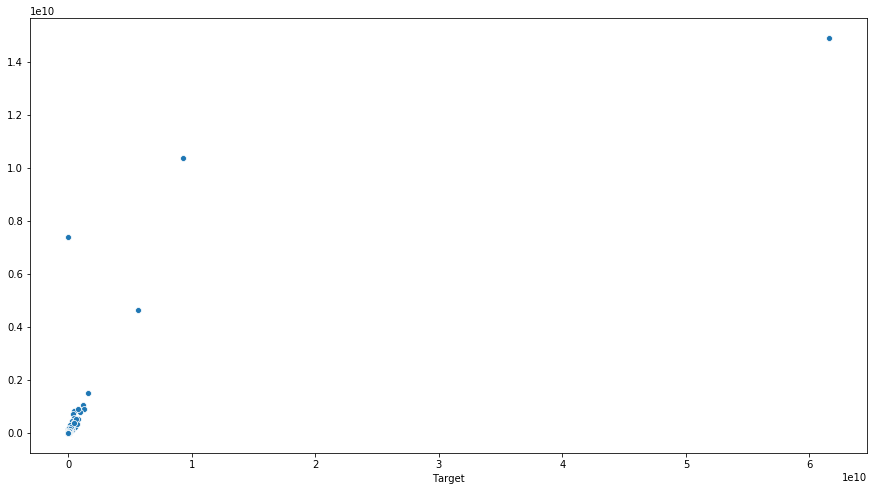

In [71]:
# Make predictions and get the targets
model.eval()
predictions = model(test_dataset[:][0].float().to(device)).detach().numpy()

# Transform back into scale
unscaled_predictions = y_scaler.inverse_transform(predictions)
unscaled_target = y_scaler.inverse_transform(test_dataset[:][1].float().to(device))
print("Scaled Results")
regression_results(test_dataset[:][1].float().to(device), predictions)
print()
print("Rescaled Results")
regression_results(y_test, unscaled_predictions)

plt.figure(figsize=(15,8))
sns.scatterplot((y_test), (unscaled_predictions.flatten()))

In [0]:
per_point_abs_error = sorted(np.abs(unscaled_predictions - unscaled_target), reverse=True)[:10]


In [0]:
per_point_abs_error[0][0]

22429094000.0

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in log10
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in log10
  This is separate from the ipykernel package so we can avoid doing imports until


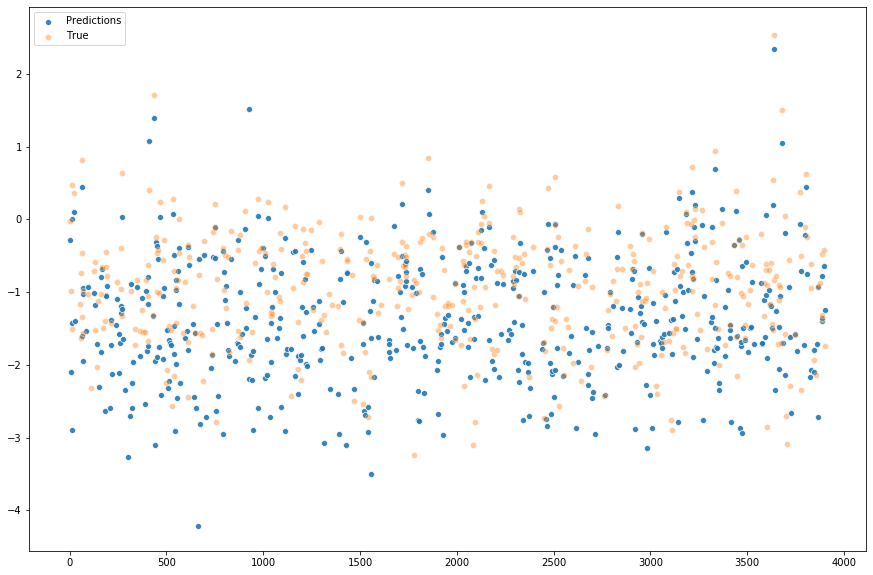

In [0]:
plt.figure(figsize=(15,10))
sns.scatterplot(list(range(len(y_test))), np.log10(predictions.flatten()),alpha=0.9, label='Predictions')
sns.scatterplot(list(range(len(y_test))), np.log10(y_test_scaled.flatten()),alpha=0.4, label='True')
plt.legend()
plt.show()

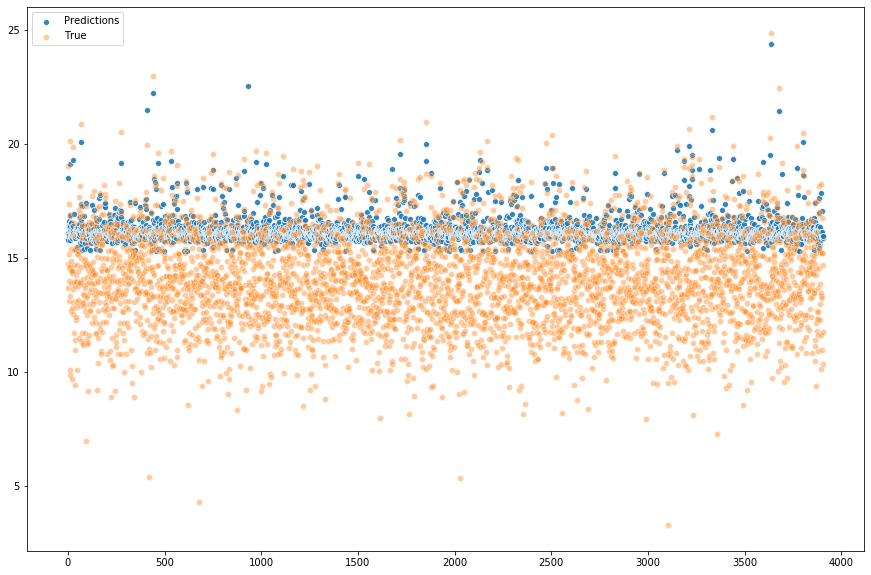

In [0]:
plt.figure(figsize=(15,10))
sns.scatterplot(list(range(len(y_test))), np.log(unscaled_predictions.flatten()),alpha=0.9, label='Predictions')
sns.scatterplot(list(range(len(y_test))), np.log(unscaled_target.flatten()),alpha=0.4, label='True')
plt.legend()
plt.show()

In [0]:
best_r2 = 0.72
iteration +=1
MAE = metrics.mean_absolute_error(unscaled_target, unscaled_predictions)
MSE = metrics.mean_squared_error(unscaled_target, unscaled_predictions)
print(f'MAE of test set: {MAE}')
print(f'MSE of test set: {MSE}')
print(f'R^2 score: {metrics.r2_score(unscaled_target, unscaled_predictions)}' )
print(f'Explained Variance: {metrics.explained_variance_score(unscaled_target, unscaled_predictions)}')

test_loss = test()
print(f'Test Loss: {test_loss:.4e}')
print(f'Percentage we are off on average based on MAE: {MAE/np.mean(unscaled_target):.4e}')


if metrics.r2_score(unscaled_target, unscaled_predictions)>best_r2:
    print('Model Saved')
    best_r2 = metrics.r2_score(unscaled_target, unscaled_predictions)
    torch.save(model, f'models/model_{iteration}_R2_{round(best_r2, 3)}')
    torch.save(model.state_dict(), f'models/model_{iteration}_R2_{round(best_r2, 3)}_params.pkl')

MAE of test set: 21059492.0
MSE of test set: 1.4907355602039603e+17
R^2 score: 0.8515233850900459
Explained Variance: 0.8515300750732422
Test Loss: 5.6707e+02
Percentage we are off on average based on MAE: 6.8276e-01
Model Saved


FileNotFoundError: ignored

In [0]:
from tabulate import tabulate
from datetime import datetime

def latex_architecture(latex,scl_name,scl,opt_name,opt,crit,rm_pol,mod,sc):
  if(latex):
    def print_func(x):print(tabulate(x, tablefmt="latex_raw"))
  else:
    def print_func(x): 
      for el in x: print(el)
      print("")

  #print(print_func(table))
  #if(latex):print(tabulate(table, tablefmt="latex_raw"))
  #else: print(table)
  table = [["scaler attributes", ""],
           ["Scaler",scl_name]]
  pars = list(scl.get_params())
  for par in pars: table.extend([[par,scl.get_params()[par]]])
  print_func(table)
  
  #removal policy
  print_func(rm_pol)#print(tabulate(rm_pol, tablefmt="latex_raw"))
  #optimizer
  table = [["Optimizer attributes:", ""],
           ["Optimizer",opt_name]]
  attr = opt.defaults
  for att in attr: table.extend([[att,opt.defaults[att]]]) 
  print_func(table)
  #print(tabulate(table, tablefmt="latex_raw"))

  #criterion
  table = [["Criterion atttributes:", ""],
           ["Loss function",crit]]
  print_func(table)
  #model architecture
  layers = mod._modules.items()
  table = [["Layers:"]]
  for layer in layers: table.extend([[layer[1]]])
  
  #print(tabulate(table, tablefmt="latex_raw"))
  print_func(table)
  #score
  #print(tabulate(sc, tablefmt="latex_raw"))
  print_func(sc)
  

  return()
removal_policy = [['Data Removal:'],['Keep only newest instance'],['All columns that sum to zero'],
                  ['All attributes with "date"'],
                  ['Attribute AARSRAPPORT_pdf'],
                  ['Attribute AARSRAPPORT_html'],
                  ['Attribute AARSRAPPORT_xml'],
                  ['Attribute _score'],
                  ['Attribute entity'],
                  ['Attribute cvrNummer'],
                  ['Attribute regnskabsperiode_startDato'],
                  ['Attribute sidstOpdateret'],
                  ['Attribute sagsNummer'],
                  ['Attribute regnskabsperiode_slutDato'],
                  ['Attribute _index'],
                  ['Attribute context'],
                  ['Attribute end_date'],
                  ['Attribute offentliggoerelsesTidspunkt'],
                  ['Attribute indlaesningsTidspunkt'],
                  ['Attribute indlaesningsId'],
                  ['Attribute _id'],
                  ['Attribute regNummer']]
score = [['Score:',""],['MAE',MAE],
         ['R2',metrics.r2_score(unscaled_target, unscaled_predictions)],
         ['Explained Variance', metrics.explained_variance_score(unscaled_target, unscaled_predictions)],
         ['MAE adjusted for mean',MAE/np.mean(unscaled_target)]
         ]
latex_architecture(latex=True,scl_name='X_scaler',scl=x_scaler,
                   opt_name="Adam",opt=optimizer,rm_pol=removal_policy,mod=model, crit=criterion,
                   sc=score)


\begin{tabular}{ll}
\hline
 scaler attributes        &                                                                        \\
 Scaler                   & X_scaler                                                               \\
 n_jobs                   &                                                                        \\
 remainder                & drop                                                                   \\
 sparse_threshold         & 0.3                                                                    \\
 transformer_weights      &                                                                        \\
 transformers             & [('num', Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True))],
         verbose=False), Index(['AverageNumberOfEmployees', 'ContributedCapital', 'CurrentAssets',
       'Equity', 'LiabilitiesAndEquity', 'ProfitLoss',
       'ProfitLossFromOrdinaryActivitiesBefo

()

In [58]:
#Using newest best model as initialization
#model = torch.load('drive/My Drive/Valid_Data/TrainedModels/model_11_R2_0.927')
model = torch.load('model_11_R2_0.927')
print(model)
#test_dataset)
print(test_dataset[:][0].size())
#len(len(test_dataset[:][0]))
#model
model.eval()
predictions = model(test_dataset[:][0].float().to(device)).detach().numpy()

# Transform back into scale
unscaled_predictions = y_scaler.inverse_transform(predictions)
unscaled_target = y_scaler.inverse_transform(y_test_scaled)
#print(y_test.shape)
#print(unscaled_predictions.shape)
regression_results(y_test_scaled, predictions)
regression_results(unscaled_target, unscaled_predictions)

NN(
  (l1): Linear(in_features=12, out_features=256, bias=True)
  (l2): Linear(in_features=256, out_features=128, bias=True)
  (l3): Linear(in_features=128, out_features=64, bias=True)
  (l4): Linear(in_features=64, out_features=32, bias=True)
  (out): Linear(in_features=32, out_features=1, bias=True)
)
torch.Size([3906, 12])
explained_variance:  0.2533
r2:  0.2531
MAE:  0.191
MSE:  23.3687
RMSE:  4.8341
Median AE:  0.066
explained_variance:  0.2533
r2:  0.2531
MAE:  34220304.0909
MSE:  7.498673131137806e+17
RMSE:  865948793.5864
Median AE:  11824470.5556


In [ ]:
#EA begins here

In [ ]:
def train(model):
    # set the train mode
    model.train()

    # loss of the epoch
    train_loss = 0
  
    for x, target in train_loader:

        target = target.float().to(device)
        x = x.to(device)
        # update the gradients to zero
        optimizer.zero_grad()

        # forward pass
        ouput = model(x.float())
            
        loss = criterion(ouput, target)

        # backward pass
        loss.backward()
        train_loss += loss.item()

        # update the weights
        optimizer.step()

    return train_loss

In [83]:
import copy
mut_rate = 0.1
mix_lay = 4
max_lay = 20
min_neuron = 8
max_neuron = 8192
options_act = ['relu','elu','leaky','tanh']
def child_create(par_net_var,mut_rate,i):
    child_net_var = copy.deepcopy(par_net_var)
    #Mutate number of layers
    if(np.random.uniform()<mut_rate*2):#add or remove a new layer with mut_rate chance
        num_layer_change = 1
        chance_var = np.random.uniform()
        if(chance_var<0.5 and len(child_net_var[0])<max_lay): #with 50% add a new layer
            inx_new_layer = np.random.randint(low=0,high=len(child_net_var[0])-1)
            new_layer_neurons = child_net_var[0][inx_new_layer]
            new_act = child_net_var[1][inx_new_layer]
            if(np.random.uniform()<0.5 and inx_new_layer!=0 ):
                new_layer_neurons = child_net_var[0][inx_new_layer-1]
                new_act = child_net_var[1][inx_new_layer]
            net_layer = [] 
            layer_actv = []
            net_layer.extend(child_net_var[0][:inx_new_layer])
            net_layer.append(new_layer_neurons)
            net_layer.extend(child_net_var[0][inx_new_layer:])
            layer_actv.extend(child_net_var[1][:inx_new_layer])
            layer_actv.append(new_act)
            layer_actv.extend(child_net_var[1][inx_new_layer:])
            child_net_var[0] = net_layer
            child_net_var[1] = layer_actv
        if(chance_var>0.5 and len(child_net_var[0])>min_lay): #with 50% remove an existing layer
            inx_del_layer = np.random.randint(low=0,high=len(child_net_var[0])-1)
            net_layer = []
            layer_actv = []
            net_layer.extend(child_net_var[0][:inx_del_layer])
            net_layer.extend(child_net_var[0][(inx_del_layer+1):])
            layer_actv.extend(child_net_var[1][:inx_del_layer])
            layer_actv.extend(child_net_var[1][(inx_del_layer+1):])
            child_net_var[0] = net_layer
            child_net_var[1] = layer_actv
    #Mutate number of neurons
    for i in range(0,len(child_net_var[0])-1):
        if(np.random.uniform()<mut_rate):
            neurons_in_layer = child_net_var[0][i]
            if(np.random.uniform()<0.5):
                neurons_in_layer = min(int(neurons_in_layer*2),max_neuron)
            else:
                neurons_in_layer = max(min_neuron,int(neurons_in_layer/2))
            child_net_var[0][i] = neurons_in_layer
    #Mutate activation functions
    for i in range(0,len(child_net_var[1])):
        if(np.random.uniform()<mut_rate):#change 1 to mut_range
            actv_func = child_net_var[1][i]
            new_acvt_func = np.random.choice([x for x in options_act if x != actv_func],size=1)
            child_net_var[1][i] = new_acvt_func[0]
    #Run again if nothing is changed
    if(child_net_var[0] == par_net_var[0] and child_net_var[1]==par_net_var[1] and i<20):
        child_net_var = child_create(par_net_var,mut_rate*1.1,i+1)
    return child_net_var 

def mutation(par_net_var,mut_rate):
    r1 = max(0.1,mut_rate/1.3)
    r2 = min(0.4,mut_rate*1.5)
    child1 = child_create(par_net_var,r1,0)
    child2 = child_create(par_net_var,r1,0)
    child3 = child_create(par_net_var,r2,0)
    child4 = child_create(par_net_var,r2,0)
    return child1,child2,child3,child4

def mutate_and_selection(par_net_var,par_score,mut_rate,keep_prior_score):
    children = mutation(par_net_var,mut_rate)
    child_scores = []
    for child in children:
        model = NN2(input_dim, child[0], child[1])
        model.to(device)
        child_scores.append(train_and_eval(model))
    best_child_score = min(child_scores)
    inx_best_child = child_scores.index(best_child_score)
    # if(len(best_child_score)>1):
    #   print("oh shit")
    mut_chance = np.random.uniform()
    if(mut_chance<0.25):
        mut_rate = max(0.1,mut_rate/1.3)
    elif(mut_chance<0.5):
        mut_rate=mut_rate = min(0.4,mut_rate*1.5)
    else:
        if(inx_best_child<3):
            mut_rate = max(0.1,mut_rate/1.3)
        else:
            mut_rate = min(0.4,mut_rate*1.5)
    if(keep_prior_score==False):
        model = NN2(input_dim, par_net_var[0], par_net_var[1])
        model.to(device)
        par_score = train_and_eval(model)
        model.eval()
        predictions = model(test_dataset[:][0].float().to(device)).detach().numpy()
        unscaled_predictions = y_scaler.inverse_transform(predictions)
        unscaled_target = y_scaler.inverse_transform(y_test_scaled)
        print(regression_results(unscaled_target, unscaled_predictions))
    if(best_child_score < par_score):
        par_score = child_scores[inx_best_child]
        par_net_var = children[inx_best_child]
        print(par_score)
        print(par_net_var)
    return par_net_var,par_score
  

In [84]:
def train_and_eval(model):
    old_loss = train(model)
    model.train()
    for e in range(20):
        new_loss = train(model)
        if(old_loss-new_loss<0.00001): 
          return(validate(model))
        old_loss = new_loss
    return(validate(model))

In [85]:
###initialized Network
par_net_var = []
layers = [256, 128, 64,32, 1]
 
par_net_var.append(layers)
act_funs = ['elu']*len(layers)
par_net_var.append(act_funs)
#print(layers)
#print(par_net_var)
model = NN2(input_dim, par_net_var[0], par_net_var[1])
model.to(device)
print(model)
par_score = train_and_eval(model)
init_mut_rate = 0.2
#Parameters boundaries
min_lay = 4
max_lay = 20
min_neuron = 8
max_neuron = 8192
options_act = ['elu', 'elu', 'elu', 'tanh']
#print(model)

NN2(
  (out): Sequential(
    (0): Linear(in_features=12, out_features=256, bias=True)
    (1): ELU(alpha=1.0)
    (2): Linear(in_features=256, out_features=128, bias=True)
    (3): ELU(alpha=1.0)
    (4): Linear(in_features=128, out_features=64, bias=True)
    (5): ELU(alpha=1.0)
    (6): Linear(in_features=64, out_features=32, bias=True)
    (7): ELU(alpha=1.0)
    (8): Linear(in_features=32, out_features=1, bias=True)
  )
)


In [ ]:

epoch_train = 20

score_history_fixed = []
for i in range(0,epoch_train):
    par_net_var, par_score = mutate_and_selection(par_net_var,par_score,init_mut_rate,keep_prior_score=True)
    score_history_fixed.append(par_score)
    if(np.mod(i,5)==0):
        print(i)
print(par_net_var)

score_history_nofix = []
for i in range(0,epoch_train):
    par_net_var, par_score = mutate_and_selection(par_net_var,par_score,init_mut_rate,keep_prior_score=False)
    score_history_nofix.append(par_score)
    if(np.mod(i,5)==0):
        print(i)
print(par_net_var)

explained_variance:  -0.0262
r2:  -0.0272
MAE:  31998954.3364
MSE:  1.0313183485161258e+18
RMSE:  1015538452.5049
Median AE:  1648191.9167
None
241.63146091788076
[[128, 64, 32, 1], ['elu', 'tanh', 'elu', 'elu']]
0
explained_variance:  -0.0005
r2:  -0.0006
MAE:  46884545.4124
MSE:  1.004609371039922e+18
RMSE:  1002302035.8355
Median AE:  23996291.7143
None
234.52864383906126
[[256, 64, 32, 1], ['elu', 'elu', 'tanh', 'elu']]
explained_variance:  0.0031
r2:  0.0031
MAE:  48422577.6301
MSE:  1.0008891640139003e+18
RMSE:  1000444483.2243
Median AE:  25695860.65
None
explained_variance:  0.0011
r2:  -0.0006
MAE:  40363299.6218
MSE:  1.0045728908618446e+18
RMSE:  1002283837.4741
Median AE:  11359243.0
None
239.60493495315313
[[256, 512, 64, 32, 1], ['elu', 'elu', 'elu', 'tanh', 'tanh']]
explained_variance:  0.0051
r2:  0.0034
MAE:  40423563.5979
MSE:  1.0005568638256639e+18
RMSE:  1000278393.1615
Median AE:  10607141.2857
None
explained_variance:  -0.0011
r2:  -0.0013
MAE:  64481073.2102
MSE

234.46766081731766
[[64, 128, 128, 1], ['elu', 'tanh', 'tanh', 'tanh']]
explained_variance:  -0.0022
r2:  -0.0026
MAE:  34850834.812
MSE:  1.0066367900196146e+18
RMSE:  1003312907.3323
Median AE:  9870170.0278
None
240.35241345621762
[[64, 128, 128, 1], ['elu', 'tanh', 'tanh', 'elu']]
explained_variance:  -0.0019
r2:  -0.0025
MAE:  35210280.5532
MSE:  1.00650326208633e+18
RMSE:  1003246361.6113
Median AE:  8253331.0
None
241.20067309134174
[[64, 64, 128, 1], ['elu', 'elu', 'tanh', 'elu']]
explained_variance:  0.006
r2:  0.0059
MAE:  44282638.7619
MSE:  9.980525674956152e+17
RMSE:  999025809.224
Median AE:  21652804.3333
None
explained_variance:  0.0032
r2:  0.0029
MAE:  37271014.3337
MSE:  1.0011021737026162e+18
RMSE:  1000550935.0866
Median AE:  12697025.5
None
232.43623152654618
[[64, 64, 64, 1], ['elu', 'elu', 'tanh', 'elu']]
85
explained_variance:  -0.0015
r2:  -0.0017
MAE:  62736440.812
MSE:  1.0057069615335727e+18
RMSE:  1002849421.1663
Median AE:  41903582.35
None
243.4763720995

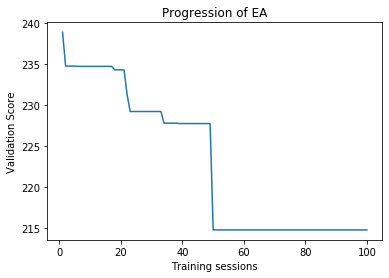

In [57]:
#plot progression
#print(score_history)
x = np.arange(1,len(score_history_fixed)+1)
plt.plot(x,score_history_fixed)
plt.xlabel('Training sessions') 
plt.ylabel('Validation Score') 
plt.title('Progression of EA')
plt.show()


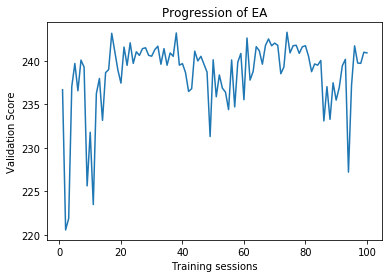

In [58]:
#plot progression
#print(score_history)
x = np.arange(1,len(score_history_nofix)+1)
plt.plot(x,score_history_nofix)
plt.xlabel('Training sessions') 
plt.ylabel('Validation Score') 
plt.title('Progression of EA')
plt.show()


In [59]:

epoch_train = 1000

score_history_fixed = []
for i in range(0,epoch_train):
    par_net_var, par_score = mutate_and_selection(par_net_var,par_score,init_mut_rate,keep_prior_score=True)
    score_history_fixed.append(par_score)
    if(np.mod(i,5)==0):
        print(i)
print(par_net_var)

score_history_nofix = []
for i in range(0,epoch_train):
    par_net_var, par_score = mutate_and_selection(par_net_var,par_score,init_mut_rate,keep_prior_score=False)
    score_history_nofix.append(par_score)
    if(np.mod(i,5)==0):
        print(i)
print(par_net_var)

0
236.70423300843686
[[512, 64, 64, 256, 1], ['elu', 'elu', 'elu', 'tanh', 'tanh']]
234.66637685149908
[[512, 32, 128, 1], ['elu', 'elu', 'tanh', 'elu']]
5
229.29890178330243
[[512, 32, 128, 1], ['elu', 'elu', 'elu', 'tanh']]
10
15
20
25
30
35
40
227.46583696082234
[[512, 16, 128, 1], ['elu', 'elu', 'elu', 'tanh']]
45
50
55
60
65
220.30581126688048
[[512, 16, 256, 1], ['elu', 'elu', 'elu', 'elu']]
70
75
80
85
90
95
100
105
110
115
120
125
130
135
140
145
150
218.39171709492803
[[256, 8, 512, 1], ['elu', 'elu', 'elu', 'elu']]
155
160
165
170
175
180
185
190
195
200
205
210
215
216.916776265949
[[256, 8, 256, 1], ['elu', 'elu', 'elu', 'elu']]
220
225
230
235
240
245
250
255
260
265
270
275
280
285
290
295
300
305
310
315
320
325
330
335
340
345
350
355
360
365
370
375
380
385
390
395
400
405
410
415
420
425
430
435
440
445
450
455
460
465
470
475
480
485
490
495
500
505
510
515
520
525
530
535
540
545
550
555
560
565
570
575
216.57976821437478
[[512, 8, 256, 1], ['elu', 'elu', 'elu', 'el

KeyboardInterrupt: 

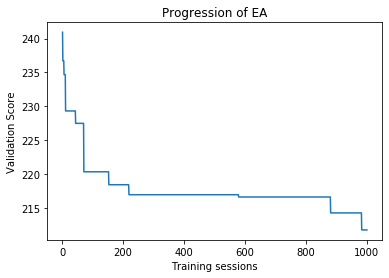

In [61]:
#plot progression
#print(score_history)
x = np.arange(1,len(score_history_fixed)+1)
plt.plot(x,score_history_fixed)
plt.xlabel('Training sessions') 
plt.ylabel('Validation Score') 
plt.title('Progression of EA')
plt.show()


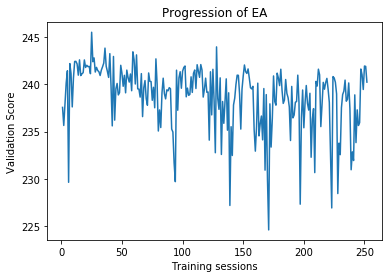

In [62]:
#plot progression
#print(score_history)
x = np.arange(1,len(score_history_nofix)+1)
plt.plot(x,score_history_nofix)
plt.xlabel('Training sessions') 
plt.ylabel('Validation Score') 
plt.title('Progression of EA')
plt.show()
